In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Importing necessary libraries

In [ ]:
import pandas as pd
import numpy as np
from shapely.geometry import Point, Polygon

### Reading lightning observation data for Mar 2018.

In [ ]:
df0=pd.read_csv("/content/drive/MyDrive/Lightning/data/lightning observation data/LLN_data/2018/mar2018.csv")
df0.head()

,FlashID,PartitionSegmentCode,LightningTimeString,Latitude,Longitude,Height,StrokeType,Amplitude,StrokeSolution,Confidence,FlashDate
0,36045964,7,2018-03-03T04:53:03.892340719,16.65284,72.31696,13795,1,1298,NaN,100,2018-03-03
1,36045965,7,2018-03-03T10:49:36.212908625,24.28252,74.52587,14663,1,-4437,NaN,100,2018-03-03
2,36045966,7,2018-03-03T10:51:32.721044838,24.44192,74.54557,10676,1,-5981,NaN,100,2018-03-03
3,36045967,7,2018-03-03T11:59:57.120238006,9.37666,76.84990,10558,1,-5730,NaN,100,2018-03-03
4,36045968,7,2018-03-03T12:43:57.404874145,20.23711,75.92641,19614,1,-1784,NaN,100,2018-03-03


### Pre-processing 

In [ ]:
df0.drop('FlashID', inplace=True, axis=1)
df0.drop('FlashDate', inplace=True, axis=1)
df0.drop('PartitionSegmentCode',inplace=True, axis=1)
df0.drop('StrokeSolution', inplace=True, axis=1)
df0.drop('Confidence', inplace=True, axis=1)
df0.drop('StrokeType', inplace=True, axis=1)
df0.drop('Height', inplace=True, axis=1)

In [ ]:
li= []
from dateutil import parser

for i in df0.iloc[:,0].to_numpy():
  date_time = i.split('T')[0]+' '+i.split('T')[1].split('.')[0]
  time_obj = parser.parse(date_time)
  li.append(time_obj)

In [ ]:
df0['date_time'] = li
df0.drop('LightningTimeString', inplace=True, axis=1)

In [ ]:
df0=df0.loc[df0['date_time']>='2018-04-01 00:00:00']

In [ ]:
df0.head()

,Latitude,Longitude,Amplitude,date_time
43782,20.99679,79.83468,-2237,2018-04-01 08:03:32
43783,15.66247,78.74552,-2627,2018-04-01 08:06:49
43784,10.60453,76.87400,-9124,2018-04-01 08:07:46
43785,15.66677,78.69583,2664,2018-04-01 08:08:21
43786,10.97648,76.79691,-10401,2018-04-01 08:08:48


### Reading lightning observation data for Apr and May 2018.

In [ ]:
df1=pd.read_csv("/content/drive/MyDrive/Lightning/data/lightning observation data/LLN_data/2018/apr2018.csv")
df1.head()

,FlashID,PartitionSegmentCode,LightningTimeString,Latitude,Longitude,Height,StrokeType,Amplitude,StrokeSolution,Confidence,FlashDate
0,36111604,8,2018-04-02T00:20:14.168638408,12.84213,75.58814,18305,1,-24434,NaN,100,2018-04-02
1,36111605,8,2018-04-02T00:22:07.900519847,12.81644,75.55875,0,0,-38648,NaN,100,2018-04-02
2,36111606,8,2018-04-02T00:25:49.421217620,12.49339,75.46998,18624,1,-22602,NaN,100,2018-04-02
3,36111607,8,2018-04-02T00:54:03.297683417,12.32033,75.41792,16910,1,-12351,NaN,100,2018-04-02
4,36111608,8,2018-04-02T00:54:48.627192735,12.31161,75.39277,11681,1,-17219,NaN,100,2018-04-02


In [ ]:
df2=pd.read_csv("/content/drive/MyDrive/Lightning/data/lightning observation data/LLN_data/2018/may2018.csv")
df2.head()

,FlashID,PartitionSegmentCode,LightningTimeString,Latitude,Longitude,Height,StrokeType,Amplitude,StrokeSolution,Confidence,FlashDate
0,37104765,9,2018-05-02T00:03:03.902511119,17.82246,75.56181,8239,1,-2707,NaN,100,2018-05-02
1,37104766,9,2018-05-02T00:04:48.600742042,17.58586,75.34878,16745,1,3724,NaN,100,2018-05-02
2,37104767,9,2018-05-02T00:05:07.552290320,12.94868,77.16155,16612,1,6428,NaN,100,2018-05-02
3,37104768,9,2018-05-02T00:08:01.400324583,13.09055,77.08078,0,0,-6918,NaN,100,2018-05-02
4,37104769,9,2018-05-02T00:09:07.340709328,17.54038,75.34506,16184,1,-2942,NaN,100,2018-05-02


### Further pre-processing.

In [ ]:
 frames = [df1, df2]
 df = pd.concat(frames)

In [ ]:
df.drop('FlashID', inplace=True, axis=1)
df.drop('FlashDate', inplace=True, axis=1)
df.drop('PartitionSegmentCode',inplace=True, axis=1)
df.drop('StrokeSolution', inplace=True, axis=1)
df.drop('Confidence', inplace=True, axis=1)
df.drop('StrokeType', inplace=True, axis=1)
df.drop('Height', inplace=True, axis=1)

In [ ]:
li= []
from dateutil import parser

for i in df.iloc[:,0].to_numpy(): 
  date_time = i.split('T')[0]+' '+i.split('T')[1].split('.')[0]
  time_obj = parser.parse(date_time)
  li.append(time_obj)

In [ ]:
df['date_time'] = li
df.drop('LightningTimeString', inplace=True, axis=1)

In [ ]:
df.head()

,Latitude,Longitude,Amplitude,date_time
0,12.84213,75.58814,-24434,2018-04-02 00:20:14
1,12.81644,75.55875,-38648,2018-04-02 00:22:07
2,12.49339,75.46998,-22602,2018-04-02 00:25:49
3,12.32033,75.41792,-12351,2018-04-02 00:54:03
4,12.31161,75.39277,-17219,2018-04-02 00:54:48


In [ ]:
frames= [df0,df]
df = pd.concat(frames)

In [ ]:
df = df[(df["Latitude"].between(15,22))]

In [ ]:
df = df[(df["Longitude"].between(73,81))]

In [ ]:
df.sort_values('date_time')

,Latitude,Longitude,Amplitude,date_time
43782,20.99679,79.83468,-2237,2018-04-01 08:03:32
43783,15.66247,78.74552,-2627,2018-04-01 08:06:49
43785,15.66677,78.69583,2664,2018-04-01 08:08:21
43791,18.59108,78.85552,-6472,2018-04-01 08:42:59
43793,18.59138,78.74610,4172,2018-04-01 08:44:01
...,...,...,...,...
1758579,17.09037,78.54969,-70127,2018-06-01 23:59:38
1758586,16.36808,78.95904,-25769,2018-06-01 23:59:39
1758583,15.85628,79.01097,-10364,2018-06-01 23:59:40
1758584,18.69080,80.48594,10224,2018-06-01 23:59:41


In [ ]:
#amplitude values between 
#df = df[(df["Amplitude"].between(-60000,60000))]
#df.iloc[:15,:]

,Latitude,Longitude,Amplitude,date_time
43782,20.99679,79.83468,-2237,2018-04-01 08:03:32
43783,15.66247,78.74552,-2627,2018-04-01 08:06:49
43785,15.66677,78.69583,2664,2018-04-01 08:08:21
43791,18.59108,78.85552,-6472,2018-04-01 08:42:59
43793,18.59138,78.74610,4172,2018-04-01 08:44:01
43794,18.56363,78.87938,-5399,2018-04-01 08:44:17
43795,16.30574,78.67069,-3175,2018-04-01 08:44:23
43796,18.56910,78.74748,-2307,2018-04-01 08:44:32
43798,18.58654,78.69682,11572,2018-04-01 08:44:56
43799,18.56488,78.82633,2940,2018-04-01 08:45:09


In [ ]:
df.head()

,Latitude,Longitude,Amplitude,date_time
43782,20.99679,79.83468,-2237,2018-04-01 08:03:32
43783,15.66247,78.74552,-2627,2018-04-01 08:06:49
43785,15.66677,78.69583,2664,2018-04-01 08:08:21
43791,18.59108,78.85552,-6472,2018-04-01 08:42:59
43793,18.59138,78.74610,4172,2018-04-01 08:44:01


### Creating 1 hour time intervals

In [ ]:
from datetime import datetime, timedelta

def datetime_range(start, end, delta):
    current = start
    while current < end:
        yield current
        current += delta

dts = [dt.strftime('%Y-%m-%dT%H:%M:%S') for dt in 
       datetime_range(datetime(2018, 4, 1, 0), datetime(2018, 6, 1, 0), 
       timedelta(minutes=60))]

time_intervals = []

for i in dts:
  date_time = i.split('T')[0]+' '+i.split('T')[1]
  time_obj = parser.parse(date_time)
  time_intervals.append(time_obj)

print(time_intervals[0])
print(len(time_intervals))

2018-04-01 00:00:00
1464


In [ ]:
lons = np.arange(73,81.25,0.25)

In [ ]:
lats = np.arange(22,14.75,-0.25)

In [ ]:
times = time_intervals  

In [ ]:
data = np.zeros((1464,29,33))

### Storing lightning observation data according to its occurrence over the specific grid.

In [ ]:
for i in range(len(df)):
  date_time = df.iloc[i,3]
  latitude,longitude,amplitude = df.iloc[i,0],df.iloc[i,1],df.iloc[i,2]
  index = 0
  for j in time_intervals:
    if(date_time<=j):
      break
    index+=1
  time_index = index-1
  lat_index,long_index = int(((latitude*10)-150)/2.5), int(((longitude*10)-730)/2.5)
  try:
    if abs(amplitude) > 0:
      data[time_index,lat_index,long_index] = 1
    else:
      data[time_index,lat_index,long_index] = 0
  except:
    print(latitude,longitude)
    break

### Reading the meteorological data.

In [ ]:
import xarray as xr

In [ ]:
ds_disk1 = xr.open_dataset("/content/drive/MyDrive/Lightning/data/meteorological data/Single_Level/adaptor.mars.internal-1630658901.3232534-28291-18-34562262-d4a0-48ec-ab1b-715ccb12f56d.nc")

In [ ]:
ds_disk1

<xarray.Dataset>
Dimensions:    (latitude: 29, longitude: 33, time: 1464)
Coordinates:
  * longitude  (longitude) float32 73.0 73.25 73.5 73.75 ... 80.5 80.75 81.0
  * latitude   (latitude) float32 22.0 21.75 21.5 21.25 ... 15.5 15.25 15.0
  * time       (time) datetime64[ns] 2018-04-01 ... 2018-05-31T23:00:00
Data variables:
    cape       (time, latitude, longitude) float32 ...
    p80.162    (time, latitude, longitude) float32 ...
    p79.162    (time, latitude, longitude) float32 ...
Attributes:
    Conventions:  CF-1.6
    history:      2021-09-03 08:48:29 GMT by grib_to_netcdf-2.20.0: /opt/ecmw...

In [ ]:
ds_disk1.cape.values.shape

(1464, 29, 33)

In [ ]:
ds_disk2 = xr.open_dataset("/content/drive/MyDrive/Lightning/data/meteorological data/Pressure_Levels/2018.nc")

In [ ]:
ds_disk2

<xarray.Dataset>
Dimensions:    (latitude: 29, level: 16, longitude: 33, time: 1464)
Coordinates:
  * longitude  (longitude) float32 73.0 73.25 73.5 73.75 ... 80.5 80.75 81.0
  * latitude   (latitude) float32 22.0 21.75 21.5 21.25 ... 15.5 15.25 15.0
  * level      (level) int32 500 550 600 650 700 750 ... 900 925 950 975 1000
  * time       (time) datetime64[ns] 2018-04-01 ... 2018-05-31T23:00:00
Data variables:
    r          (time, level, latitude, longitude) float32 ...
    clwc       (time, level, latitude, longitude) float32 ...
    t          (time, level, latitude, longitude) float32 ...
    w          (time, level, latitude, longitude) float32 ...
Attributes:
    Conventions:  CF-1.6
    history:      2021-09-03 08:40:43 GMT by grib_to_netcdf-2.20.0: /opt/ecmw...

### Storing lightning observation data and meteorological data in a xarray dataset.

In [ ]:
times = ds_disk2.time.values
lon = ds_disk2.longitude.values
lat = ds_disk2.latitude.values
pressure = ds_disk2.level.values

In [ ]:
cape = ds_disk1.cape.values
p80_162 = ds_disk1['p80.162'].values
p79_162 = ds_disk1['p79.162'].values

In [ ]:
r = ds_disk2.r.values
clwc = ds_disk2.clwc.values
t = ds_disk2.t.values
w = ds_disk2.w.values

In [ ]:
data_2018 = xr.Dataset(
    {
        "r":(          
          ("time", "level", "latitude", "longitude"),
          r,
          dict(
            units = '%',
            long_name= 'Relative humidity',
            standard_name= 'relative_humidity',
            ),
        ),
        "clwc":(
          ("time", "level", "latitude", "longitude"),
          clwc,
          dict(
            units = 'kg kg**-1',
            long_name= 'Specific cloud liquid water content',
            ),
        ),
        "t":(
          ("time", "level", "latitude", "longitude"),
          t,
          dict(
            units = 'K',
            long_name= 'Temperature',
            standard_name = 'air_temperature',
            ),  
        ),
        "w":(
          ("time", "level", "latitude", "longitude"),
          w,  
          dict(
            units = 'Pa s**-1',
            long_name= 'Vertical velocity',
            standard_name = 'lagrangian_tendency_of_air_pressure',
            ), 
        ),
        "cape":(
            ("time", "latitude", "longitude"),
            cape,
            dict(
            units = 'J kg**-1',
            long_name= 'Convective available potential energy',
            ),
        ),
       "p80.162":(
           ("time", "latitude", "longitude"),
           p80_162,
           dict(
            units = 'kg m**-2 s**-1',
            long_name= 'Vertical integral of divergence of cloud frozen water flux',
            ),
       ),
       "p79.162":(
           ("time", "latitude", "longitude"),
           p79_162,
           dict(
            units = 'kg m**-2 s**-1',
            long_name= 'Vertical integral of divergence of cloud liquid water flux',
            ),
       ),
      "Amplitude":(
           ("time", "latitude", "longitude"),
           data,
           dict(
            units = 'Amp',
            long_name= 'Amplitude of lightning',
            ),
       ),
    },
    coords={"longitude": lon, "latitude": lat, "level": pressure ,"time": times},
    attrs=dict(description="Parameters affecting lightning data."),
)

In [ ]:
data_2018

<xarray.Dataset>
Dimensions:    (latitude: 29, level: 16, longitude: 33, time: 1464)
Coordinates:
  * longitude  (longitude) float32 73.0 73.25 73.5 73.75 ... 80.5 80.75 81.0
  * latitude   (latitude) float32 22.0 21.75 21.5 21.25 ... 15.5 15.25 15.0
  * level      (level) int32 500 550 600 650 700 750 ... 900 925 950 975 1000
  * time       (time) datetime64[ns] 2018-04-01 ... 2018-05-31T23:00:00
Data variables:
    r          (time, level, latitude, longitude) float32 1.496 1.625 ... 86.85
    clwc       (time, level, latitude, longitude) float32 0.0 0.0 ... 0.0 0.0
    t          (time, level, latitude, longitude) float32 266.6 266.5 ... 302.0
    w          (time, level, latitude, longitude) float32 0.04724 ... 0.005646
    cape       (time, latitude, longitude) float32 83.68 202.7 ... 3.734e+03
    p80.162    (time, latitude, longitude) float32 -8.536e-08 ... -8.157e-07
    p79.162    (time, latitude, longitude) float32 -5.743e-07 ... 1.007e-06
    Amplitude  (time, latitude, longitude) float64 0.0 0.0 0.0 ... 0.0 0.0 0.0
Attributes:
    description:  Parameters affecting lightning data.

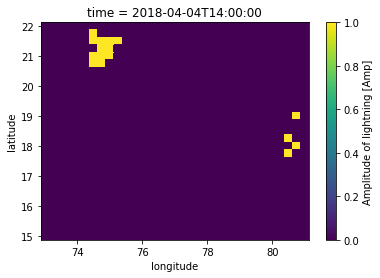

In [ ]:
plot2d = data_2018.Amplitude.isel(time=86)
plot2d.plot()

### Storing the data as netcdf file.

In [2]:
data_2018.to_netcdf('/content/drive/MyDrive/Lightning/data/pre-processed data/data2018.nc')

NameError: ignored